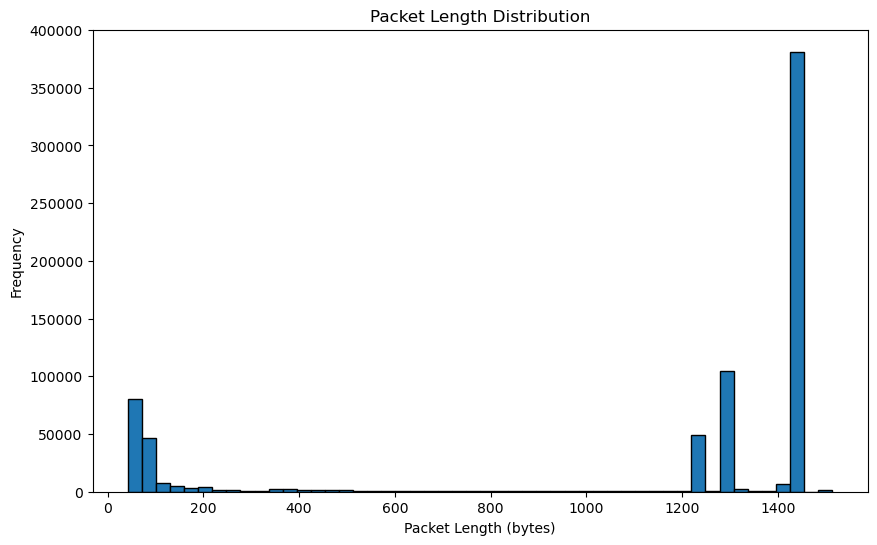

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('traffic_weir.csv', encoding='latin1')

packet_lengths = df.iloc[:, 5]

plt.figure(figsize=(10, 6))
plt.hist(packet_lengths, bins=50, edgecolor='black')
plt.title("Packet Length Distribution")
plt.xlabel("Packet Length (bytes)")
plt.ylabel("Frequency")
plt.show()


In [18]:
import pandas as pd

# Load the CSV file with the correct encoding (adjust 'latin1' if necessary)
df = pd.read_csv('traffic_weir.csv', encoding='latin1')

# Extract packet lengths from the 6th column
packet_lengths = df.iloc[:, 5]

# Create a frequency table of packet lengths
frequency_table = packet_lengths.value_counts().reset_index()
frequency_table.columns = ['Packet Length (bytes)', 'Count']

# Sort the frequency table by 'Count' in descending order
frequency_table = frequency_table.sort_values(by='Count', ascending=False)

# Display the sorted frequency table
print(frequency_table)

# Write the sorted frequency table to a CSV file
frequency_table.to_csv('packet_weir_sorted.csv', index=False)




      Packet Length (bytes)   Count
0                      1434  380928
1                      1292  101883
2                        66   69974
3                      1242   48769
4                        78    7419
5                        75    5683
6                      1422    5347
7                        74    4167
8                        54    3145
9                        77    3048
10                       97    2614
11                       73    2588
12                       87    2494
13                       89    2310
14                       86    2119
15                       72    2002
16                     1322    1888
17                       82    1607
18                       76    1384
19                       68    1314
20                       67    1273
21                     1424    1132
22                       80    1050
23                     1288    1040
24                      158     979
25                       90     957
26                       84 

In [20]:
frequency_table = frequency_table.sort_values(by='Packet Length (bytes)', ascending=True)

# Display the sorted frequency table
print(frequency_table)
frequency_table.to_csv('packet_weir_sorted_by_length.csv', index=False)

      Packet Length (bytes)   Count
65                       42     274
1308                     46       5
8                        54    3145
44                       60     532
1367                     62       3
50                       63     431
53                       64     403
28                       65     883
2                        66   69974
20                       67    1273
19                       68    1314
32                       69     848
49                       70     491
40                       71     639
15                       72    2002
11                       73    2588
7                        74    4167
5                        75    5683
18                       76    1384
9                        77    3048
4                        78    7419
27                       79     907
22                       80    1050
31                       81     871
17                       82    1607
46                       83     512
26                       84 

In [27]:
max_length = frequency_table['Packet Length (bytes)'].max()

full_range = pd.Series(range(0, max_length + 1), name='Packet Length (bytes)')

full_frequency_table = pd.merge(full_range, frequency_table, on='Packet Length (bytes)', how='left').fillna(0)

missing_lengths = full_frequency_table[full_frequency_table['Count'] == 0]['Packet Length (bytes)'].tolist()

missing_lengths_df = pd.DataFrame(missing_lengths, columns=['Missing Packet Length (bytes)'])
missing_lengths_df.to_csv('missing_weir.csv', index=False)


In [2]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('traffic_weir.csv', encoding='latin1')

# Extract relevant columns: packet length (assuming it's column 6) and protocol (assuming it's column 5)
packet_lengths = df.iloc[:, 4]  # Protocol
packet_size = df.iloc[:, 5]     # Packet Length

# Combine the protocol and packet length into a DataFrame
df_packet_protocol = pd.DataFrame({
    'Protocol': packet_lengths,
    'Packet Length (bytes)': packet_size
})

# Group by both packet length and protocol, then count occurrences
frequency_table = df_packet_protocol.groupby(['Packet Length (bytes)', 'Protocol']).size().reset_index(name='Count')

# Sort by count in descending order, then by packet length
frequency_table = frequency_table.sort_values(by=['Count', 'Packet Length (bytes)'], ascending=[False, True])

# Display the sorted frequency table
print(frequency_table)

# Optionally save to a CSV
frequency_table.to_csv('traffic_weir_packet_protocol_sorted_by_count.csv', index=False)
print("Frequency table has been saved to 'traffic_weir_packet_protocol_sorted_by_count.csv'")


      Packet Length (bytes) Protocol   Count
5282                   1434      TCP  332238
4978                   1292     QUIC   71051
17                       66      TCP   68696
4813                   1242     QUIC   48765
5284                   1434  TLSv1.3   40374
...                     ...      ...     ...
5300                   1478     MDNS       1
5306                   1485  TLSv1.2       1
5315                   1498  TLSv1.2       1
5317                   1504     MDNS       1
5318                   1505      TCP       1

[5322 rows x 3 columns]
Frequency table has been saved to 'traffic_weir_packet_protocol_sorted_by_count.csv'


In [3]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('traffic_weir.csv', encoding='latin1')

# Extract relevant columns: protocol (assuming it's column 5) and packet length (assuming it's column 6)
protocol = df.iloc[:, 4]        # Protocol
packet_size = df.iloc[:, 5]     # Packet Length

# Combine the protocol and packet length into a DataFrame
df_packet_protocol = pd.DataFrame({
    'Protocol': protocol,
    'Packet Length (bytes)': packet_size
})

# Group by both packet length and protocol, then count occurrences
frequency_table = df_packet_protocol.groupby(['Packet Length (bytes)', 'Protocol']).size().reset_index(name='Count')

# Sort by protocol in ascending order, then by packet length and count
frequency_table = frequency_table.sort_values(by=['Protocol', 'Packet Length (bytes)', 'Count'], ascending=[True, True, False])

# Display the sorted frequency table
print(frequency_table)

# Optionally save to a CSV
frequency_table.to_csv('traffic_weir_packet_protocol_sorted_by_protocol.csv', index=False)
print("Frequency table has been saved to 'traffic_weir_packet_protocol_sorted_by_protocol.csv'")


      Packet Length (bytes)             Protocol  Count
0                        42                  ARP    274
3                        60                  ARP    229
842                     216              BROWSER     42
955                     240              BROWSER      2
970                     243              BROWSER      2
...                     ...                  ...    ...
4967                   1288                  UDP     13
4980                   1292                  UDP  30821
4987                   1295                  UDP      1
5043                   1322                  UDP    202
4981                   1292  UDP, HiPerConTracer      4

[5322 rows x 3 columns]
Frequency table has been saved to 'traffic_weir_packet_protocol_sorted_by_protocol.csv'


In [4]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('traffic_weir.csv', encoding='latin1')

# Extract the protocol column (assuming it's column 5)
protocol = df.iloc[:, 4]  # Protocol

# Count occurrences of each protocol
protocol_counts = protocol.value_counts().reset_index()
protocol_counts.columns = ['Protocol', 'Count']

# Sort by protocol for a cleaner view
protocol_counts = protocol_counts.sort_values(by='Protocol', ascending=True)

# Display the protocol count table
print(protocol_counts)

# Optionally save to a CSV
protocol_counts.to_csv('traffic_weir_protocol_counts.csv', index=False)
print("Protocol counts have been saved to 'traffic_weir_protocol_counts.csv'")


               Protocol   Count
10                  ARP     503
12              BROWSER      46
11     DB-LSP-DISC/JSON     321
8                  DHCP     837
6                   DNS    5451
14                 HTTP      20
15                 ICMP      13
13               ICMPv6      25
4                  MDNS    9545
9                  NBNS     706
16                  NTP       6
1                  QUIC  166485
5                 SSLv2    7951
0                   TCP  421716
7               TLSv1.2    4725
2               TLSv1.3   71073
3                   UDP   34985
17  UDP, HiPerConTracer       4
Protocol counts have been saved to 'traffic_weir_protocol_counts.csv'


In [4]:
import pandas as pd

# Load the CSV file with the correct encoding
df = pd.read_csv('weir.csv', encoding='latin1')

# Extract relevant columns: source address, protocol, and packet length
source_address = df.iloc[:, 2]   # Source Address
protocol = df.iloc[:, 4]         # Protocol
packet_lengths = df.iloc[:, 5]   # Packet Length

# Combine the source address, protocol, and packet length into a DataFrame
df_combined = pd.DataFrame({
    'Source Address': source_address,
    'Protocol': protocol,
    'Packet Length (bytes)': packet_lengths
})

# Create a frequency table grouping by source address, protocol, and packet length, then count occurrences
frequency_table = df_combined.groupby(['Source Address', 'Protocol', 'Packet Length (bytes)']).size().reset_index(name='Count')

# Sort the frequency table by 'Packet Length (bytes)' in ascending order and then by 'Count' in descending order
frequency_table = frequency_table.sort_values(by=['Packet Length (bytes)', 'Count'], ascending=[True, False])

# Display the sorted frequency table
print(frequency_table)

# Write the sorted frequency table to a CSV file
frequency_table.to_csv('packet_weir_sorted_by_length.csv', index=False)

print("Frequency table sorted by packet length has been saved to 'packet_weir_sorted_by_length.csv'")


       Source Address Protocol  Packet Length (bytes)  Count
27462  Apple_02:d7:dc      ARP                     42    274
13394   172.24.204.48      UDP                     46      5
11611   172.24.204.48      TCP                     54   3145
3065     13.107.42.14      TCP                     60     74
26582   69.194.240.13      TCP                     60     37
...               ...      ...                    ...    ...
11679   172.24.204.48      TCP                   1514     43
3412    130.74.120.45  TLSv1.2                   1514     23
3435    130.74.121.11  TLSv1.2                   1514      2
3439    130.74.121.13      TCP                   1514      2
3444    130.74.121.13  TLSv1.2                   1514      1

[27556 rows x 4 columns]
Frequency table sorted by packet length has been saved to 'packet_weir_sorted_by_length.csv'
